In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import fkplotlib

# plt.style.use("dark_background")
fkplotlib.use_txfonts()


def a10(r):
    """
    A10 params for ACTJ0215
    """
    P0, rp, a, b, c = [6.10498005e-2, 6.75922137e2, 1.05100000, 5.49050000, 0.308100000]
    x = r / rp
    return P0 * x ** (-c) * (1.0 + x ** a) ** ((c - b) / a)


def interp_powerlaw(x, y, x_new, axis=0):
    """
    Interpolate/extrapolate a profile with a power-law by performing
    linear inter/extrapolation in the log-log space.

    Args:
        x (array): input x-axis.
        y (array): input `f(x)`.
        x_new (float or array): `x` value(s) at which to perform interpolation.

    Returns:
        (float or array): `f(x_new)`

    """

    w_nonzero = np.where(x > 0.0)

    log_x = np.log10(x[w_nonzero])
    log_y = np.log10(y[w_nonzero])

    interp = interp1d(
        log_x,
        log_y,
        kind="linear",
        bounds_error=False,
        fill_value="extrapolate",
        axis=axis,
    )
    y_new = 10 ** interp(np.log10(x_new))

    return y_new

<IPython.core.display.Javascript object>


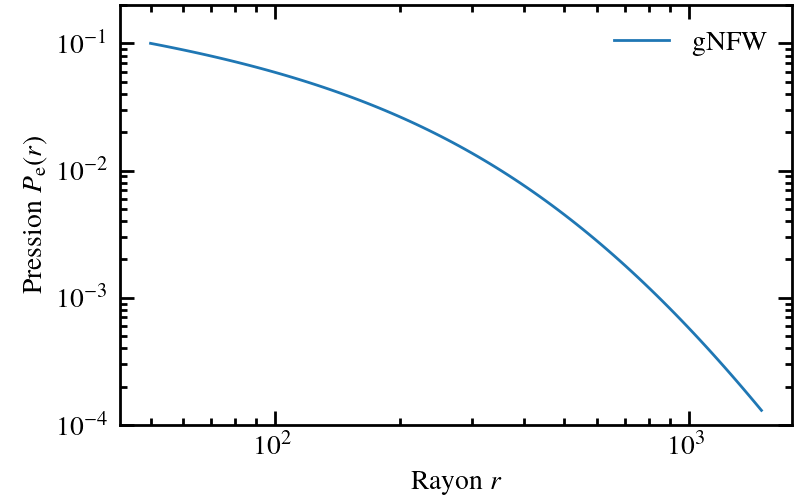

<IPython.core.display.Javascript object>


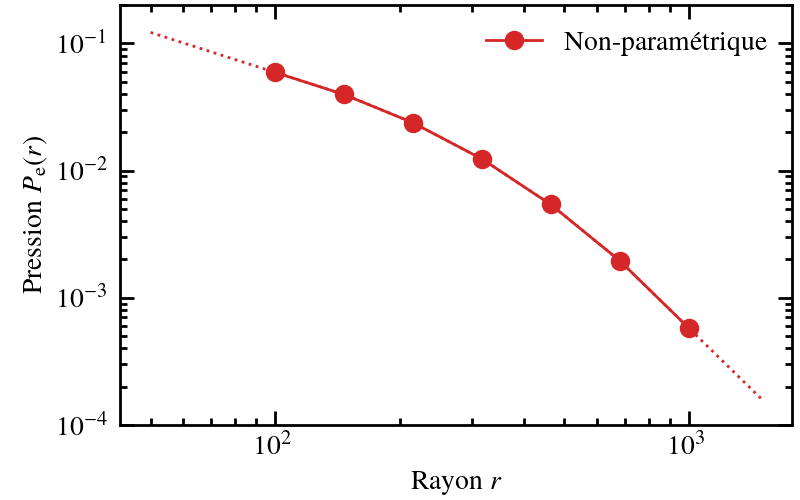

In [17]:
r_gnfw = np.logspace(np.log10(50), np.log10(1500), 100)
r_np = np.logspace(2, 3, 7)
r_np_2 = np.concatenate(([r_gnfw[0]], r_np, [r_gnfw[-1]]))
p_np = a10(r_np)

fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(r_gnfw, a10(r_gnfw), color="tab:blue", label="gNFW", zorder=1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4, 2e-1)
fkplotlib.ax_bothticks(ax)
ax.set_xlabel(r"Rayon $r$")
ax.set_ylabel(r"Pression $P_{\rm e}(r)$")
ax.legend(frameon=False)
fig.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
fig.savefig("gnfw.pdf")

fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(r_np, p_np, "o-", zorder=3, color="tab:red", label="Non-paramétrique")
ax.plot(r_np_2, interp_powerlaw(r_np, p_np, r_np_2), ":", zorder=2, color="tab:red")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4, 2e-1)
fkplotlib.ax_bothticks(ax)
ax.set_xlabel(r"Rayon $r$")
ax.set_ylabel(r"Pression $P_{\rm e}(r)$")
ax.legend(frameon=False)
fig.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
fig.savefig("nonparam.pdf")